# Fraud AI Detector
### LauzHack project
#### By: Mariona Casasnovas Simon, Martina Hernández Prado, Núria López Encinas and Joan Riera Tur


In [1]:
%pip install --upgrade pip  --quiet
%pip install pandas  --upgrade --quiet
%pip install numpy  --upgrade --quiet
%pip install scipy  --upgrade --quiet
%pip install statsmodels  --upgrade --quiet
%pip install seaborn  --upgrade --quiet
%pip install scikit-learn --upgrade --quiet
%pip install tqdm ipykernel matplotlib ipywidgets --upgrade --quiet   
%pip install descartes
%pip install geopandas
%pip install librosa
%pip install plotly


%load_ext autoreload

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.3 which is incompatible.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-2.0.2-cp312-cp312-win_amd64.whl.metadata (59 kB)
Using cached numpy-2.0.2-cp312-cp312-win_amd64.whl (15.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.core.display import display, HTML
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
import warnings
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from statsmodels.genmod.generalized_linear_model import GLM
from pandas.plotting import scatter_matrix
from scipy.stats import boxcox
import sys
sys.stdout.flush()
import os

%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

import plotly.express as px

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

import librosa
import librosa.display
import IPython.display as ipd

import sklearn

import warnings
warnings.filterwarnings('ignore')

InteractiveShell.ast_node_interactivity = "all"
display.precision = 3
sns.set()


C:\Users\marti\AppData\Local\Temp\ipykernel_18504\3040533690.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [ ]:
# # Import data
train_csv = pd.read_csv(".../training_set.csv")
test_csv = pd.read_csv(".../test_set.csv")
full_csv = pd.read_csv(".../full_habla_updated_metadata.csv")
smile_csv = pd.read_csv(".../smile_feature_selected.csv")



### Data analysis and preprocessing

#### Numerical Variables


In [4]:
full_csv.shape
full_csv.columns
full_csv['Utterance'].nunique()


(80816, 25)

Index(['Filename', 'F_path', 'F1', 'F2', 'F3', 'F4', 'ID', 'File_ID',
       'Source_ID', 'File_Source_ID', 'Target_ID', 'File_Target_ID',
       'Source_Sex', 'Source_Country', 'Target_Sex', 'Target_Country', 'Sex',
       'Country', 'Source_Utterance', 'Target_Utterance', 'Utterance',
       'Variant', 'Transcription', 'Times', 'UniqueID'],
      dtype='object')

22816

In [5]:

# Eliminar columnas que no me sirven de full_csv
full_csv_ed = full_csv.drop(columns=['Filename', 'F_path', 'F1', 'F2', 'F3', 'F4', 'ID', 'File_ID', 'Source_ID',
                                      'File_Source_ID', 'Target_ID', 'File_Target_ID', 'Source_Sex', 'Source_Country', 'Source_Utterance', 'Variant', 'Transcription', 'Times'])


In [6]:
full_csv_ed.shape
full_csv_ed.columns


(80816, 7)

Index(['Target_Sex', 'Target_Country', 'Sex', 'Country', 'Target_Utterance',
       'Utterance', 'UniqueID'],
      dtype='object')

In [7]:
smile_csv.shape
smile_csv.columns


(80816, 16)

Index(['Unnamed: 0', 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope.1',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm',
       'mfcc3_sma3_amean', 'mfcc3_sma3_stddevNorm', 'jitterLocal_sma3nz_amean',
       'slopeUV500-1500_sma3nz_amean', 'UniqueID'],
      dtype='object')

In [8]:
smile_csv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,80816.0,40407.500000,23329.714015,0.000000,20203.750000,40407.500000,60611.250000,80815.000000
F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,80816.0,113.951954,144.616993,0.000000,28.236189,86.174395,147.397380,2087.097000
F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,80816.0,43.353231,114.393363,-2448.985600,17.524441,25.106316,37.825207,4659.957500
F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope.1,80816.0,43.353231,114.393363,-2448.985600,17.524441,25.106316,37.825207,4659.957500
F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,80816.0,47.828090,133.652154,0.000000,8.628156,13.888202,28.633718,2294.165500
loudness_sma3_amean,80816.0,0.467605,0.237702,0.041620,0.312310,0.420252,0.566612,3.204929
spectralFlux_sma3_stddevNorm,80816.0,1.446313,0.355365,0.694461,1.185881,1.411638,1.659912,4.222191
mfcc1_sma3_amean,80816.0,18.377609,4.111353,-1.798633,15.637055,18.347288,21.035505,36.090004
mfcc1_sma3_stddevNorm,80816.0,0.905121,0.287027,-5.672723,0.740178,0.859837,1.016663,38.977646
mfcc2_sma3_amean,80816.0,9.697731,4.886923,-10.598875,6.677935,10.086592,13.208384,26.485899


In [9]:
def data_explore_num(dataframe):
    print("DATA EXPLORATION")
    print('*'*70)
    print("Shape of dataset : ",dataframe.shape)
    print('*'*70)
    dataframe.info()
    print('*'*70)
    print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
    print('*'*70)
    print(dataframe.describe().T)
    print('*'*70)
    print("MISSING VALUES")
    print('*'*70)
    print(dataframe.isna().sum().sort_values(ascending=False))
    print('*'*70)
    print("MISSING VALUES IN %")
    print('*'*70)
    print(round(100* (dataframe.isnull().sum() / len(dataframe)).sort_values(ascending=False),2))
    print('*'*70)
    
    num_cols = len(smile_csv.columns)  
    num_rows = (num_cols // 2) + (num_cols % 2 > 0)  

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

    axes = axes.flatten()

    
    for i, col in enumerate(smile_csv.columns):
        smile_csv[col].hist(bins=500, ax=axes[i], color='purple', edgecolor='purple')
        axes[i].set_title(f"Histograma de {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()


DATA EXPLORATION
**********************************************************************
Shape of dataset :  (80816, 16)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80816 entries, 0 to 80815
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      80816 non-null  int64  
 1   F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope   80816 non-null  float64
 2   F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope    80816 non-null  float64
 3   F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope.1  80816 non-null  float64
 4   F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope  80816 non-null  float64
 5   loudness_sma3_amean                             80816 non-null  float64
 6   spectralFlux_sma3_stddevNorm                    80816 non-null  float64
 7   mf

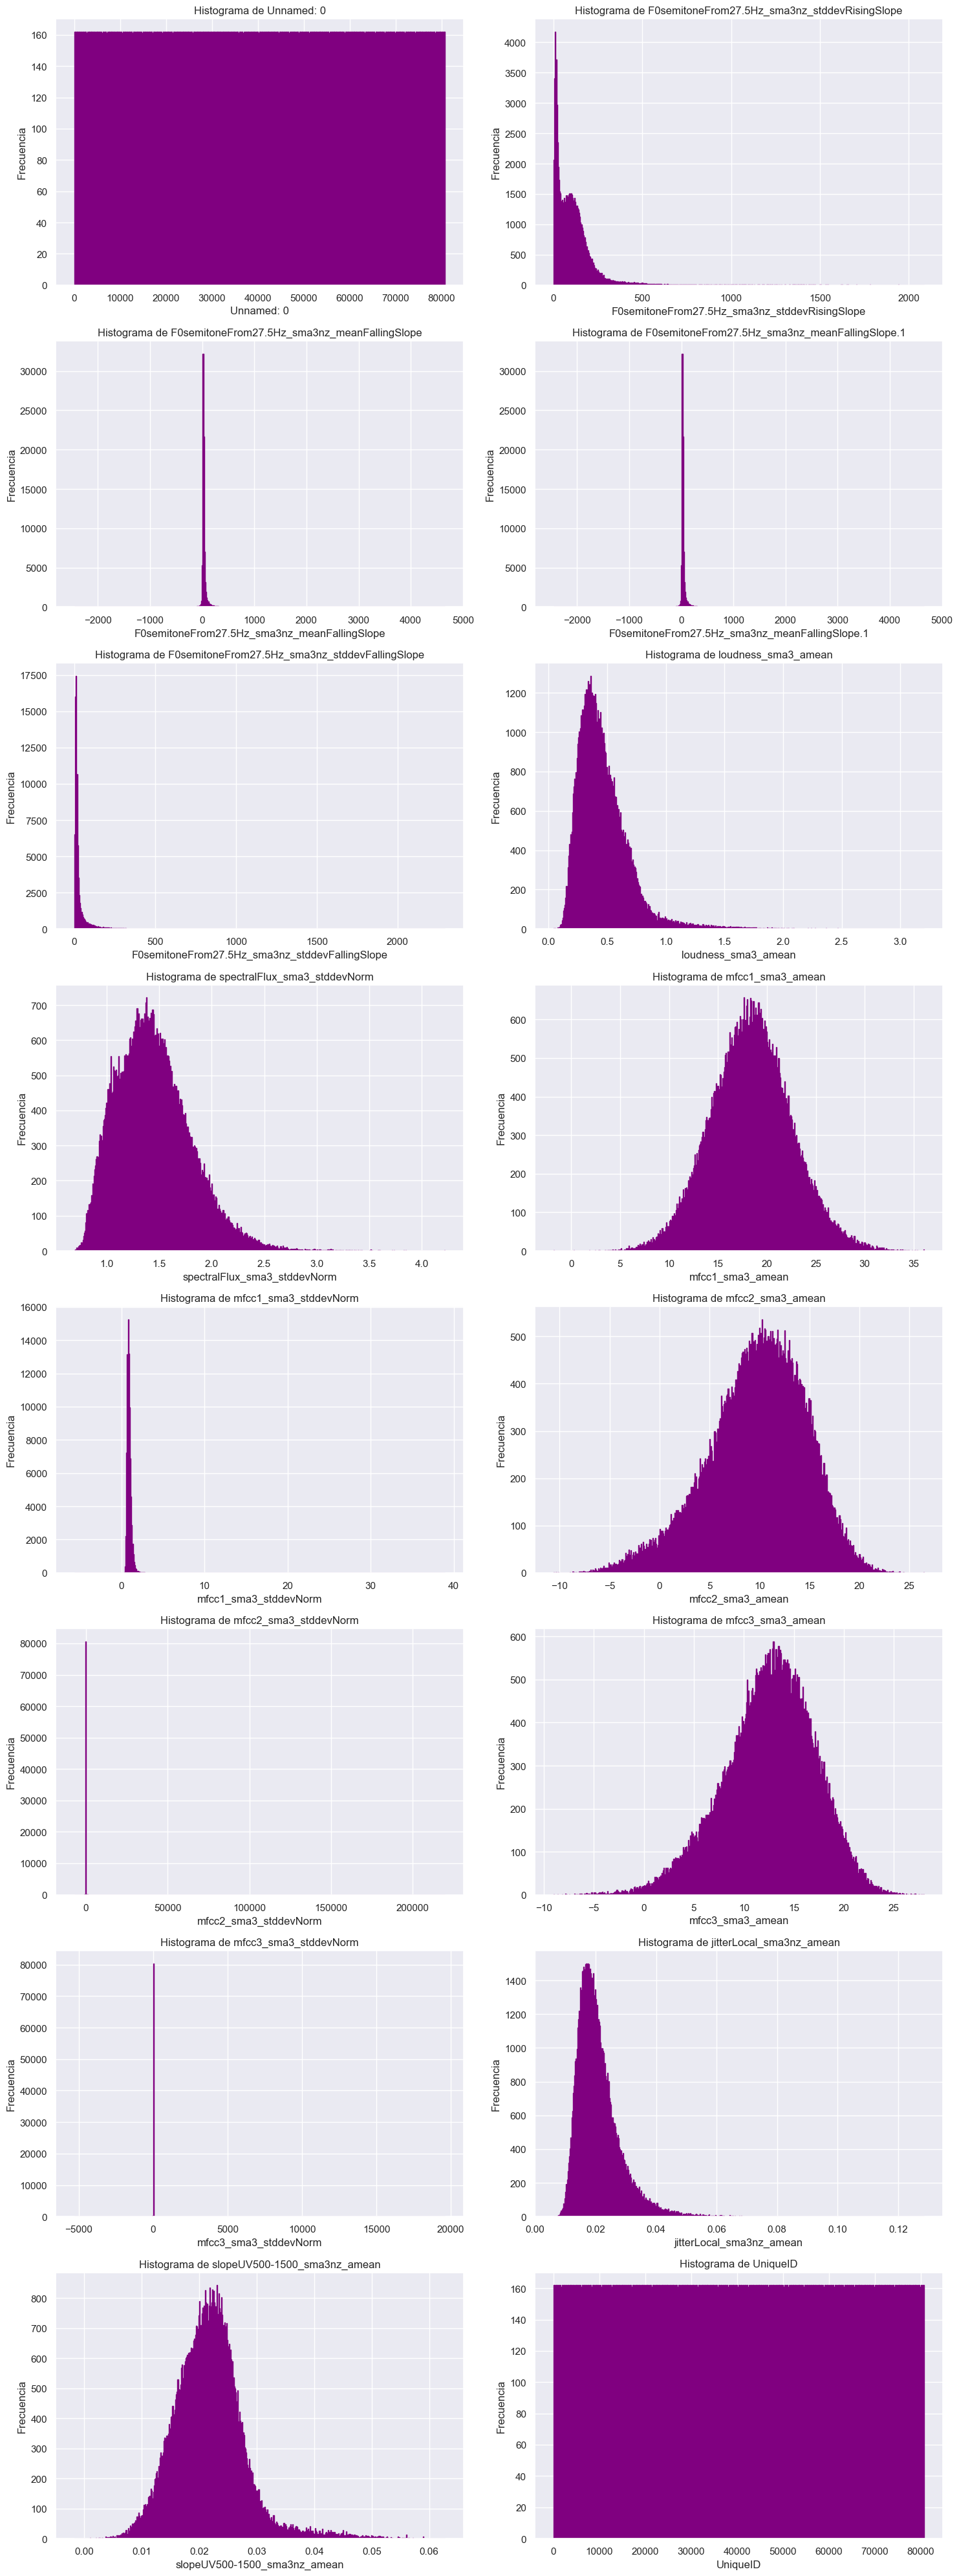

In [10]:
data_explore_num(smile_csv)

In [11]:
smile_csv = smile_csv.drop(columns=['Unnamed: 0'])

### Categorical Variables

In [12]:
def data_explore_cat(dataframe):
    print("DATA EXPLORATION")
    print('*'*70)
    print("Shape of dataset : ",dataframe.shape)
    print('*'*70)
    print(dataframe.info())
    print('*'*70)
    print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
    print('*'*70)
    print(dataframe.describe(exclude = ['float', 'int64']).T)
    print('*'*70)
    print("MISSING VALUES")
    print('*'*70)
    print(dataframe.isna().sum().sort_values(ascending=False))
    print('*'*70)
    print("MISSING VALUES IN %")
    print('*'*70)
    print(round(100* (dataframe.isnull().sum() / len(dataframe)).sort_values(ascending=False),2))
    print('*'*70)
    
    print("UNIQUE VALUES PER COLUMN")
    print('*'*70)
    for col in dataframe.select_dtypes(include=['object']).columns:
        print(f"{col}: {dataframe[col].nunique()} uniques")

    cat_columns = dataframe.select_dtypes(include=['object']).columns

    for col in cat_columns:
        if dataframe[col].isna().sum() > 0: 
            dataframe[col] = dataframe[col].fillna('Missing')

        else:
            dataframe[col] = dataframe[col]
       
        value_counts = dataframe[col].value_counts()
        
        plt.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
        plt.title(f"Distribución de la Variable Categórica {col}", fontsize=14)
        plt.xlabel('Categorías', fontsize=12)
        plt.ylabel('Frecuencia', fontsize=12)
        plt.xticks(rotation=45)
        plt.show()
    

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (80816, 7)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80816 entries, 0 to 80815
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Target_Sex        58000 non-null  object 
 1   Target_Country    58000 non-null  object 
 2   Sex               22816 non-null  object 
 3   Country           22816 non-null  object 
 4   Target_Utterance  53000 non-null  float64
 5   Utterance         22816 non-null  float64
 6   UniqueID          80816 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 4.3+ MB
None
**********************************************************************
STATISTICAL ANALYSIS OF CATEGORICAL DATA
**********************************************************************
                count unique 

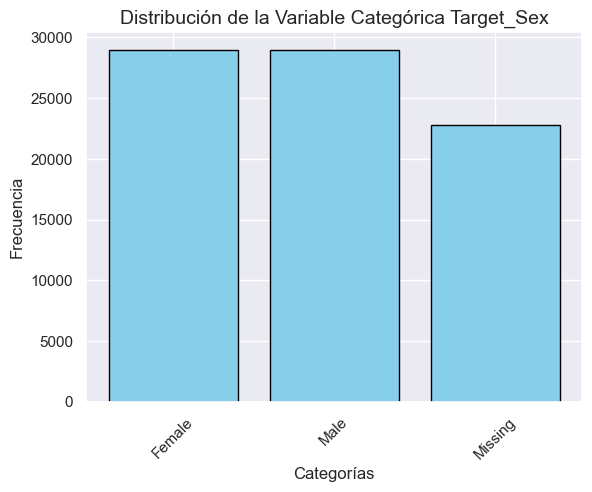

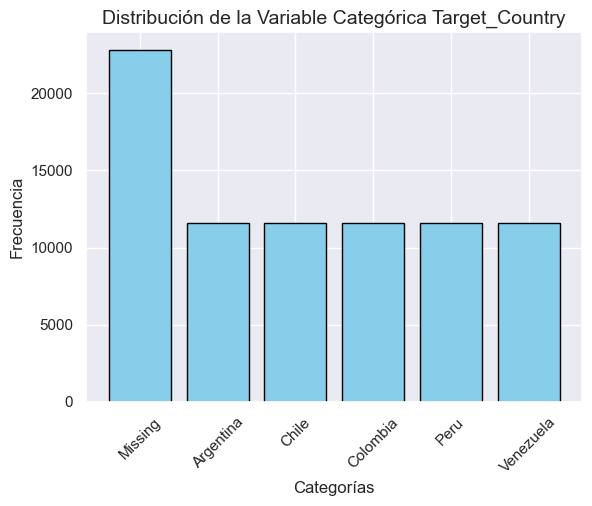

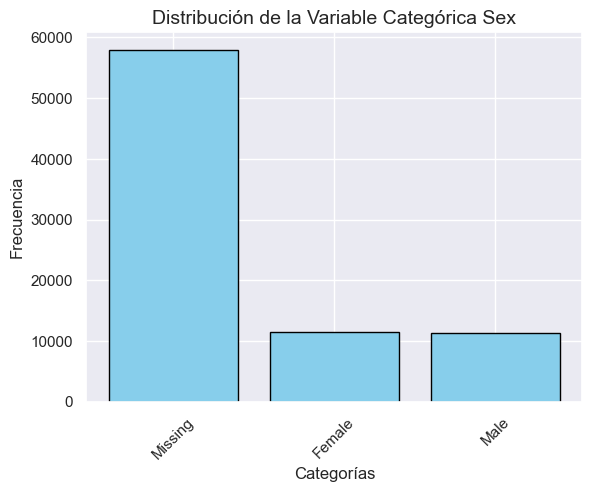

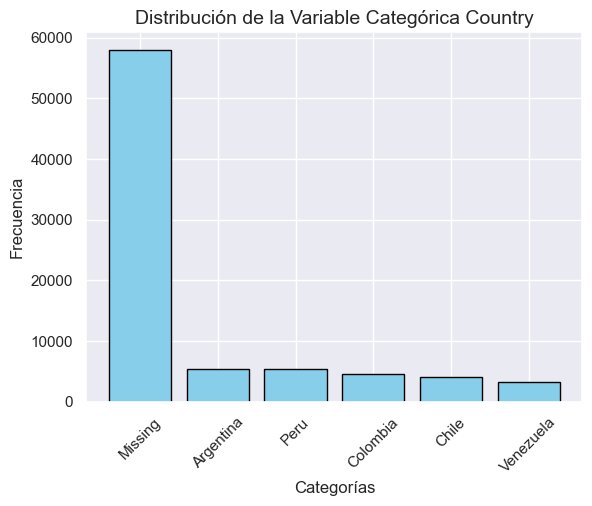

In [13]:
data_explore_cat(full_csv_ed)


### Study of data balancing

In [14]:
train_obj = train_csv['Realornot'].value_counts()
print(f"Frecuencias de variable objetivo en el conjunto de train: {train_obj}")
test_obj = test_csv['Realornot'].value_counts()
print(f"Frecuencias de variable objetivo en el conjunto de test: {test_obj}")

Frecuencias de variable objetivo en el conjunto de train: Realornot
1    8939
0    8865
Name: count, dtype: int64
Frecuencias de variable objetivo en el conjunto de test: Realornot
1    1200
0    1172
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 1.0, "Distribución de la Variable Objetivo 'Realornot' en conjunto Train")

Text(0.5, 0, 'Categorías')

Text(0, 0.5, 'Frecuencia')

([<matplotlib.axis.XTick at 0x18e15b755b0>,
 [Text(0, 0, 'Clase 0'), Text(1, 0, 'Clase 1')])

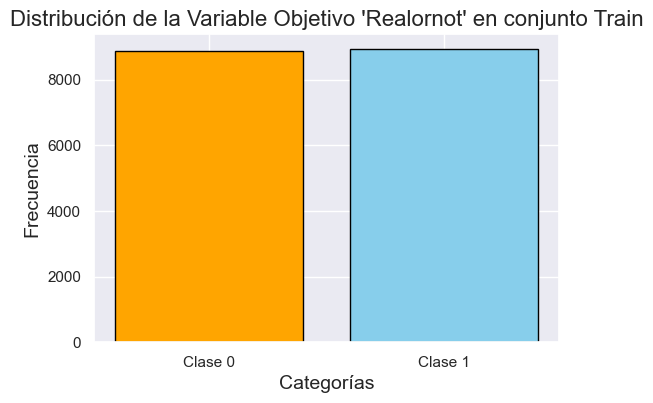

<Figure size 600x400 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 1.0, "Distribución de la Variable Objetivo 'Realornot' en conjunto Test")

Text(0.5, 0, 'Categorías')

Text(0, 0.5, 'Frecuencia')

([<matplotlib.axis.XTick at 0x18e156a1b20>,
 [Text(0, 0, 'Clase 0'), Text(1, 0, 'Clase 1')])

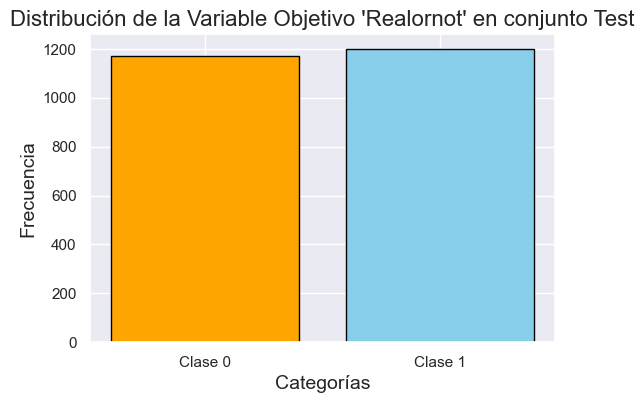

In [15]:
datos = [train_obj, test_obj]
nombres = ['Train', 'Test']

for datos, nombres in zip(datos, nombres):
    plt.figure(figsize=(6, 4))
    plt.bar(datos.index, datos.values, color=['skyblue', 'orange'], edgecolor='black')
    plt.title(f"Distribución de la Variable Objetivo 'Realornot' en conjunto {nombres}", fontsize=16)
    plt.xlabel('Categorías', fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.xticks(ticks=[0, 1], labels=['Clase 0', 'Clase 1']) 
    plt.show()

### Management of missings and outliers

In [16]:
full_csv_ed['missing_count'] = full_csv_ed.isnull().sum(axis=1)
observaciones_con_missings = full_csv_ed[full_csv_ed['missing_count'] > 4]
print(observaciones_con_missings)


Empty DataFrame
Columns: [Target_Sex, Target_Country, Sex, Country, Target_Utterance, Utterance, UniqueID, missing_count]
Index: []


In [17]:
full_csv_ed2 = full_csv_ed.copy()

full_csv_ed2['Final_Country'] = full_csv_ed2['Country'].combine_first(full_csv_ed2['Target_Country'])

full_csv_ed2['Final_Sex'] = full_csv_ed2['Sex'].combine_first(full_csv_ed2['Target_Sex'])

full_csv_ed2['Final_Utterance'] = full_csv_ed2['Utterance'].combine_first(full_csv_ed2['Target_Utterance'])


In [18]:
full_csv_ed2 = full_csv_ed2.drop(columns=['Country', 'Target_Country', 'Sex', 'Target_Sex', 'Utterance', 'Target_Utterance'])

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (80816, 5)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80816 entries, 0 to 80815
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UniqueID         80816 non-null  int64  
 1   missing_count    80816 non-null  int64  
 2   Final_Country    80816 non-null  object 
 3   Final_Sex        80816 non-null  object 
 4   Final_Utterance  75816 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.1+ MB
None
**********************************************************************
STATISTICAL ANALYSIS OF CATEGORICAL DATA
**********************************************************************
               count unique      top   freq
Final_Country  80816      6  Missing  58000
Final_Sex      80816      3  Missing  5800

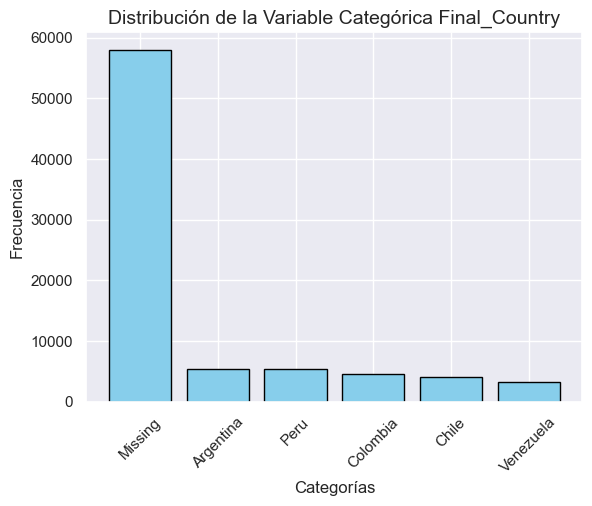

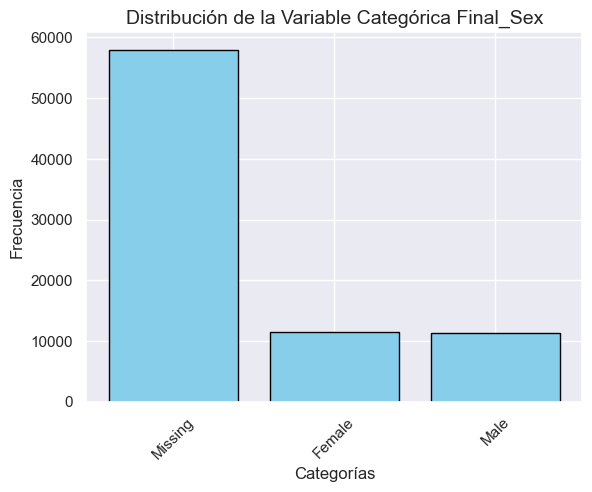

In [19]:
data_explore_cat(full_csv_ed2)

In [20]:
def detect_outliers_iqr(dataframe):
    outliers = pd.DataFrame(columns=dataframe.columns)  

    for col in dataframe.columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calcular límites
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        # Identificar outliers
        outliers_columna = dataframe[(dataframe[col] < limite_inferior) | (dataframe[col] > limite_superior)]

         # Contamos cuántos outliers hay
        total_outliers = len(outliers_columna)
        percentage = (total_outliers / len(dataframe[col])) * 100

        print("Nombre d'outliers en " + col + ": " + str(total_outliers) + " | " + str(percentage) + "%")

        
        dataframe.loc[(dataframe[col]< limite_inferior) | (dataframe[col]> limite_superior), col] = np.nan

In [21]:
outliers = detect_outliers_iqr(smile_csv)

Nombre d'outliers en F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope: 3513 | 4.346911502672738%
Nombre d'outliers en F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope: 10653 | 13.181795684022966%
Nombre d'outliers en F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope.1: 10653 | 13.181795684022966%
Nombre d'outliers en F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope: 11749 | 14.537962779647595%
Nombre d'outliers en loudness_sma3_amean: 2874 | 3.5562264898039992%
Nombre d'outliers en spectralFlux_sma3_stddevNorm: 1118 | 1.383389427836072%
Nombre d'outliers en mfcc1_sma3_amean: 851 | 1.0530093050881013%
Nombre d'outliers en mfcc1_sma3_stddevNorm: 2661 | 3.292664818847753%
Nombre d'outliers en mfcc2_sma3_amean: 863 | 1.0678578499307068%
Nombre d'outliers en mfcc2_sma3_stddevNorm: 10837 | 13.409473371609582%
Nombre d'outliers en mfcc3_sma3_amean: 877 | 1.0851811522470798%
Nombre d'outliers en mfcc3_sma3_stddevNorm: 6949 | 8.598544842605426%
Nombre d'outliers en jitterLocal_sma3nz_amean: 3265 | 4.04004157

In [22]:
smile_train_realornot = pd.merge(smile_csv, train_csv[['UniqueID', 'Realornot']], on='UniqueID', how='inner')
test_with_realornot = pd.merge(smile_csv, test_csv[['UniqueID', 'Realornot']], on='UniqueID', how='inner')

In [23]:
X = smile_train_realornot.drop(columns=['Realornot']) 
y = smile_train_realornot['Realornot']               
sss1 = StratifiedShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=42)

#80% trainning 20% validation
for train_idx, valid_idx in sss1.split(X, y):
    train = smile_train_realornot.iloc[train_idx]
    valid = smile_train_realornot.iloc[valid_idx]

train.head()
valid.head()


,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope.1,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,jitterLocal_sma3nz_amean,slopeUV500-1500_sma3nz_amean,UniqueID,Realornot
521,266.31775,22.280085,22.280085,9.284071,0.800759,0.986885,18.779259,0.836205,-2.822450,NaN,3.471272,NaN,0.013407,0.026731,3022.0,0
13877,246.24562,NaN,NaN,NaN,0.284042,1.667555,18.215500,0.764672,19.358915,0.598828,13.368500,1.064205,0.028382,0.017098,68755.0,1
8792,90.85696,6.345877,6.345877,29.334476,0.158850,NaN,9.805636,1.221794,15.106521,0.694103,14.580640,0.712346,0.026411,0.026897,56312.0,1
16760,248.93704,NaN,NaN,NaN,0.696723,0.949874,15.625353,1.098303,14.214093,0.784639,15.731487,1.104311,0.031674,0.018705,77245.0,0
3474,110.94571,21.634329,21.634329,8.815713,NaN,1.538236,9.811618,1.316027,3.555737,NaN,9.761094,1.370985,0.012736,0.027040,20932.0,0


,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope.1,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,jitterLocal_sma3nz_amean,slopeUV500-1500_sma3nz_amean,UniqueID,Realornot
9186,178.759860,23.023030,23.023030,7.774274,0.342295,1.712448,15.313975,1.008159,15.402570,0.743072,20.671768,0.547023,0.019057,0.026957,56869.0,1
4892,65.998750,17.535538,17.535538,4.656993,0.184264,1.445154,15.772187,1.161994,0.985362,NaN,8.340726,2.023335,0.014402,0.033377,32527.0,0
3205,95.419110,52.108124,52.108124,36.840360,0.322950,1.420935,24.559418,0.797482,15.930743,0.651457,13.004771,1.002201,0.014629,0.012154,16680.0,0
13533,68.744280,20.507710,20.507710,12.675548,0.328000,1.507460,15.036362,1.074648,17.144957,0.542651,15.929301,0.910906,0.013741,0.028324,67722.0,1
14074,6.351432,28.425110,28.425110,12.897773,0.391921,1.654771,12.739742,1.107309,7.567112,1.734636,14.556579,0.725137,0.016013,0.027867,69312.0,1


In [24]:
valid_realornot = valid['Realornot'] 
valid.drop(columns='Realornot', inplace=True)
test_realornot = test_with_realornot['Realornot'] 
test = test_with_realornot.drop(columns='Realornot')
train_realornot = smile_train_realornot['Realornot']
train = smile_train_realornot.drop(columns='Realornot')

In [25]:
datasets = {'train': train, 'valid': valid, 'test': test}

processed_datasets = {}

scaler = StandardScaler()
knn_imputer = KNNImputer(n_neighbors=5)

for name, df in datasets.items():
    
    df = pd.DataFrame(df)

    columns_to_scale = df.drop(columns=['UniqueID'])  
    column_to_exclude = df['UniqueID']               

    scaled_columns = scaler.fit_transform(columns_to_scale)

    imputed_scaled_data = knn_imputer.fit_transform(scaled_columns)

    imputed_scaled_df = pd.DataFrame(imputed_scaled_data, columns=columns_to_scale.columns, index=columns_to_scale.index)

    final_df = pd.concat([imputed_scaled_df, column_to_exclude], axis=1)

    processed_datasets[name] = final_df

train_processed = processed_datasets['train']
valid_processed = processed_datasets['valid']
test_processed = processed_datasets['test']

In [26]:
correlation_matrix = train_processed.corr()

threshold = 0.8

correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)

{'mfcc2_sma3_stddevNorm', 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope.1', 'mfcc3_sma3_stddevNorm'}


In [27]:
train_reduced = train_processed.drop(columns=correlated_features)
valid_reduced = valid_processed.drop(columns=correlated_features)
test_reduced = test_processed.drop(columns=correlated_features)

In [28]:
train_realornot = train_realornot.astype('category')
test_realornot = test_realornot.astype('category')
valid_realornot = valid_realornot.astype('category')

## K-NEAREST NEIGHBORS

In [29]:
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_reduced, train_realornot)

   
    y_val_pred = knn.predict(valid_reduced)
    print("Accuracy en test:", accuracy_score(valid_realornot, y_val_pred))
    print("Precision en test:", precision_score(valid_realornot, y_val_pred))
    print("Recall en test:", recall_score(valid_realornot, y_val_pred))
    print("F1-score en test:", f1_score(valid_realornot, y_val_pred))
    print("Confusion matrix en test:", confusion_matrix(valid_realornot, y_val_pred))
     

KNeighborsClassifier(n_neighbors=1)

Accuracy en test: 1.0
Precision en test: 1.0
Recall en test: 1.0
F1-score en test: 1.0
Confusion matrix en test: [[1773    0]
 [   0 1788]]


KNeighborsClassifier(n_neighbors=2)

Accuracy en test: 1.0
Precision en test: 1.0
Recall en test: 1.0
F1-score en test: 1.0
Confusion matrix en test: [[1773    0]
 [   0 1788]]


KNeighborsClassifier(n_neighbors=3)

Accuracy en test: 1.0
Precision en test: 1.0
Recall en test: 1.0
F1-score en test: 1.0
Confusion matrix en test: [[1773    0]
 [   0 1788]]


KNeighborsClassifier(n_neighbors=4)

Accuracy en test: 1.0
Precision en test: 1.0
Recall en test: 1.0
F1-score en test: 1.0
Confusion matrix en test: [[1773    0]
 [   0 1788]]


KNeighborsClassifier()

Accuracy en test: 1.0
Precision en test: 1.0
Recall en test: 1.0
F1-score en test: 1.0
Confusion matrix en test: [[1773    0]
 [   0 1788]]


KNeighborsClassifier(n_neighbors=6)

Accuracy en test: 0.9997191800056164
Precision en test: 1.0
Recall en test: 0.9994407158836689
F1-score en test: 0.9997202797202798
Confusion matrix en test: [[1773    0]
 [   1 1787]]


KNeighborsClassifier(n_neighbors=7)

Accuracy en test: 0.9997191800056164
Precision en test: 1.0
Recall en test: 0.9994407158836689
F1-score en test: 0.9997202797202798
Confusion matrix en test: [[1773    0]
 [   1 1787]]


KNeighborsClassifier(n_neighbors=8)

Accuracy en test: 0.9997191800056164
Precision en test: 1.0
Recall en test: 0.9994407158836689
F1-score en test: 0.9997202797202798
Confusion matrix en test: [[1773    0]
 [   1 1787]]


KNeighborsClassifier(n_neighbors=9)

Accuracy en test: 0.9997191800056164
Precision en test: 1.0
Recall en test: 0.9994407158836689
F1-score en test: 0.9997202797202798
Confusion matrix en test: [[1773    0]
 [   1 1787]]


The best result is k=5

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
y_train = train_realornot
X_train= train_reduced
knn.fit(X_train, y_train)
y_test_pred = knn.predict(test_reduced)
print("Accuracy en test:", accuracy_score(test_realornot, y_test_pred))
print("Precision en test:", precision_score(test_realornot, y_test_pred))
print("Recall en test:", recall_score(test_realornot, y_test_pred))
print("F1-score en test:", f1_score(test_realornot, y_test_pred))
print("Confusion matrix en test:", confusion_matrix(test_realornot, y_test_pred))



KNeighborsClassifier()

Accuracy en test: 1.0
Precision en test: 1.0
Recall en test: 1.0
F1-score en test: 1.0
Confusion matrix en test: [[1172    0]
 [   0 1200]]


## SUPPORT VECTOR MACHINE

In [31]:
svm = SVC(kernel='linear', C=1.0,  random_state=42)
X_train = train_reduced.head(16000)
y_train = train_realornot.head(16000)
svm.fit(X_train, y_train)

svm_valid_predict = svm.predict(valid_reduced)

print("Accuracy en valid:", accuracy_score(valid_realornot, svm_valid_predict))
print("Precision en valid:", precision_score(valid_realornot, svm_valid_predict))
print("Recall en valid:", recall_score(valid_realornot, svm_valid_predict))
print("F1-score en valid:", f1_score(valid_realornot, svm_valid_predict))
print("Confusion matrix en valid:", confusion_matrix(valid_realornot, svm_valid_predict))

SVC(kernel='linear', random_state=42)

Accuracy en valid: 0.9216512215669755
Precision en valid: 0.865021770682148
Recall en valid: 1.0
F1-score en valid: 0.9276264591439689
Confusion matrix en valid: [[1494  279]
 [   0 1788]]


In [32]:
svm_test_predict = svm.predict(test_reduced)
print("Accuracy en test:", accuracy_score(test_realornot, svm_test_predict))
print("Precision en test:", precision_score(test_realornot, svm_test_predict))
print("Recall en test:", recall_score(test_realornot, svm_test_predict))
print("F1-score en test:", f1_score(test_realornot, svm_test_predict))
print("Confusion matrix en test:", confusion_matrix(test_realornot, svm_test_predict))

Accuracy en test: 0.927487352445194
Precision en test: 0.8746355685131195
Recall en test: 1.0
F1-score en test: 0.9331259720062208
Confusion matrix en test: [[1000  172]
 [   0 1200]]


In [35]:

def detect_fake_audio(audio_data):
    data=pd.DataFrame(audio_data)
    prediction=knn.predict(data)
    print('This audio is',end=' ')
    print('Real' if prediction else 'Fake')
    return prediction

detect_fake_audio([test_reduced.iloc[194]])
test_realornot.iloc[194]

This audio is Fake


array([0])

np.int64(0)